# CERN ROOT C++ on JupyterLab 使い方

最終編集:石崎貢平 (2021/10/04)

## JupyterLabとは

ブラウザ上でインタラクティブにデータ解析を行うことが出来るオープンソースのソフトウェア．Pythonでの利用が最も多いがC++やRust, Go, Juliaなどの言語でも利用できる．ROOTについてもJupyterLabで利用するためコード(kernel)が提供されているためJupyterLab上でROOTのコードを実行できる．  
コマンドライン上でのROOTと比較した際のメリットは
* Markdownやテキスト形式でメモを残せる．また図を載せることもできる．
* 実行したコード内容が全て保存できる．

が上げられる．

機械学習などの方面で非常に良く利用されており，クラウドサービスでも利用されている．そのような背景があるためProject Jupyter自体がGoogleやMicrosoftといった巨大テック企業から経済的な支援を受けており，今後もしばらくは開発の継続が期待できるため学んでおいて損はないし習得も容易である．

## CERN ROOTとは

CERNのグループが開発している素粒子原子核物理に特化したデータ解析ソフトウェア．
宇宙物理方面でも使われているらしい．主にC++用のライブラリとして提供されており，ROOTを使用したデータ解析にはC++の理解が重要である．
C++は習得の容易な言語ではない．ifやforを使った簡単なコード，例えばフィボナッチ数列を計算する，などは出来るが構造体，ポインタ，オブジェクト指向の理解が不十分だという学生は多い．C++はPythonやRuby, C++に近い言語ではRust，など現代的な言語が必ず持っているエコシステムを持っていないため外部ライブラリの利用の仕方が分からないという学生も沢山見てきた．私自身もC++を十二分に使いこなせるわけではない．はっきり言ってC++なんてなるべく使いたくない．

PythonでもROOT用の解析プログラムを書くことは出来るが，ライブラリ(モジュール)の説明は少なく，まともに使用するにはCERNのAPIドキュメントを理解するためにC++のオブジェクト指向の基礎的な概念(クラス，インスタンス，コンストラクタ，カプセル化，継承などなど)の理解が必要と言っても良い．

また"ROOT"という単語はUnixにおける管理者権限をもつユーザの"root"と被っているため，検索するときや検索に引っかかるようにドキュメントを作る際は"CERN ROOT"と書くようにしている．

## このDockerイメージ"philab-root"について

コンピュータ上に仮想コンピュータを作ることを仮想化という．たとえばMac OS上でWindowsやLinuxを動かしたり，Windows上でLinuxを動かしたりできる．Dockerはコンテナ型仮想化を行うソフトウェアでDocker社によって開発されている．2021年10月時点で非商用および小規模のビジネスに限って無料で利用できる．コンテナ型仮想化はハイパーバーザー型の仮想化と比較して，本格的な仮想化ではないが，軽量で他のコンピュータでも仮想化したコンピュータを簡単に展開できるという利点がある．コンテナ型仮想化はすでにソフトウェアのテストのみならずアプリ開発やソフトウェアの講習会，またクラウドサービスの提供などにも組み込まれており，Dockerはそのデファクトスタンダードだと言える．

このDockerイメージは[GitHub上のレポジトリ](https://github.com/kIshizaki-sci/philab_root)の中にある`philab_root_base/Dockerfile`と`Dockerfile`に書かれている設計図を元にビルドされている．逆にこの設計図を読めばどのようなセットアップでこの仮想化環境が作られたのかが分かる．Dockerイメージを元に立ち上げられた仮想化環境を`コンテナ`とよび，Dockerコンテナを動かしているコンピュータのことを`ホストマシン`とよぶ．

このDockerイメージ`philab-root`は名古屋大学 理学研究科 素粒子宇宙物理学専攻 素粒子物性研究室(Φ研)での利用を想定して作られた．ビルド後のDockerイメージの中には様々なライセンス規約を持つソフトウェアのバイナリコードが含まれているので再配布などは行っていない．[GitHub上のレポジトリ](https://github.com/kIshizaki-sci/philab_root)のコード自体はMITライセンスで配布しているので，MITライセンスのもとで自由に使ってほしい．

### このイメージのセットアップ
このDockerイメージはDebian系のLinux OSである**Ubuntu 21.04**をベースにPython, JupyterLab, CERN ROOT, その他Pythonパッケージをrootユーザでインストールしてある．このDockerイメージを元にコンテナを立ち上げる際の設定は`docker-compose.yml`のなかに記されている．デフォルトではユーザは`philab_member`になっているが，`root`に書き換えることでrootユーザでコンテナを操作することも出来る．philab_memberはsudoのメンバーなのでコンテナの中ではsudoを使うことで管理者権限でpythonパッケージの導入などが可能．
Unix初心者のために管理者権限で操作できいる範囲と一般ユーザで操作できる範囲を区別してもらうために敢えてこのような設計にした．philab_memberの**パスワードは"plainpassword"**．文字通りこのパスワードは平文でしかも公開しているためセキュリティリスクを伴う使用は絶対にしないでください．

使用言語は日本語に設定しており，またx86処理系ではUbuntuのアップデートやセキュリティリスクの小さなパッケージのダウンロードは理研のミラーサーバを使うように設定している．そのためイメージのビルドはコンピュータのCPUによって所要時間が大きく変わってくる．

このイメージではJupyterLabはデフォルトで`/home/philab_member/working`以下のディレクトリでコードやMarkdownを書いたりするように設定している．workingディレクトリ上で生成されたデータやコードはホストマシンともシンクロしており，コンテナ上で保存していればコンテナをシャットダウンした後でもファイルは残り続ける．

```{bash}
/home/philab_member
├── html
├── input
├── output
└── working
    └── tutorial_data
```

In [1]:
!pwd

/home/philab_member/working



またホームディレクトリにはworkingディレクトリの他に2つのディレクトリが存在する．これらはホストマシン上の同名ディレクトリと中身がシンクロしている．
* **input** : コンテナ上からファイルの読み込みが可能だが書き込みは不可能なディレクトリ．書き換えたり削除してしまうとまずい実験データをホストマシン上で入れておく．
* **output** : 解析結果などを出力するためのディレクトリ．コンテナから読み込みと書き込みが可能．
working, input, outputの3つのディレクトリはそれぞれホストマシンとシンクロしているのでコンテナをシャットダウンしてもホストマシン上に残り続けるが**それ以外のディレクトリで保存されたファイルはコンテナをシャットダウンすると消失する**．

```{bash}

```

## JupyterLabの操作

* セルの実行：`Ctrl (or Command) + Enter`でセルを実行する．
* 保存：`Ctrl (or Command) + Enter`でノートブックを保存．
* セルの削除：セルを右クリックし`Delete Cells`
* 新しいノートブックの作成：JupyterLabの左上にある+ボタンをクリック．

## 練習
実際に2つのコードを動かしてみましょう．

### 素数の計算
以下のコードは$N (<1,000,000)$以下の素数を全て求めて"prime_numbers.txt"に保存し,$N$以下の素数の個数を返します．

セルを指定した状態で`Ctrl+Enter`を押すとJust In Timeで関数が機械語にコンパイルされて，以降関数を使用できるようになります．では以下の2つのセルを実行しましょう．

In [2]:
int show_prime_numbers(int N){
    int prime_numbers[1'000'000];
    int prime_numbers_num = 0;
    if(N>1'000'000){
        cout << "N must be 1 < N < 1,000,000. The input value is" << N <<"." <<  endl;
        return -1;
    }
    
    prime_numbers[0] = 2;
    prime_numbers_num += 1;
    for(int n=2; n<N; n++){
        for(int k=2; k<n; k++){
            if(n%k==0){
                break;
            }else if(k==n-1){
                prime_numbers[prime_numbers_num]=n;
                prime_numbers_num+=1;
            }
        }
    }
    ofstream f;
    f.open("prime_numbers.txt", std::ios::out);
    for(int i=0; i<prime_numbers_num; i++){
        f << prime_numbers[i] << endl;
    }
    f.close();

    return prime_numbers_num;
}

In [3]:
%%time
show_prime_numbers(100)

(int) 25
Time: 0.20095086097717285 seconds.



上のセルの`%%time`はJupyter notebookのマジックとよばれるものの１つで，セルの実行にかかった時間を返します．$N=500, 1000, 5000, 20000, 100000, 200000, 500000$でも実行してみましょう．

In [4]:
%%time
show_prime_numbers(500)

(int) 95
Time: 0.23241329193115234 seconds.



In [5]:
%%time
show_prime_numbers(1000)

(int) 168
Time: 0.2008986473083496 seconds.



In [6]:
%%time
show_prime_numbers(5000)

(int) 669
Time: 0.30808067321777344 seconds.



In [7]:
%%time
show_prime_numbers(20000)

(int) 2262
Time: 0.5797803401947021 seconds.



In [8]:
%%time
show_prime_numbers(100000)

(int) 9592
Time: 3.103656053543091 seconds.



In [9]:
%%time
show_prime_numbers(200000)

(int) 17984
Time: 8.762156248092651 seconds.



In [10]:
%%time
show_prime_numbers(500000)

(int) 41538
Time: 40.55622696876526 seconds.



では次にここで計算した素数の個数と$N$の関係をROOTを使用してグラフにしましょう．

### ROOTを使ったグラフ描画

ここではROOTを使って簡単なグラフを作成します．詳しいことは後の章で話しますがROOTでのグラフ描画の雰囲気を感じてみてください．

In [11]:
TCanvas* c0 = new TCanvas("canvas0", "Prime number calculation time", 600, 400);
double N[8] = {100, 500, 1000, 5000, 20000, 100000, 200000, 500000};
double t[8] = {0.20, 0.20, 0.20, 0.26, 0.58, 3.10, 8.68, 41.21};
TGraph* graph = new TGraph(8, N, t);
graph->Draw("AC*");

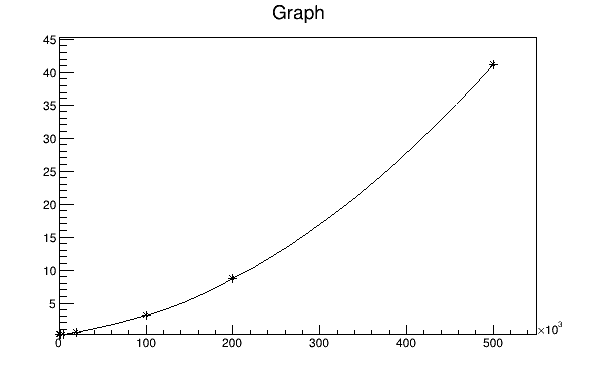

In [12]:
c0->Draw();

magic command `%jsroot`を使うことでグラフの拡大などインタラクティブに操作できるグラフが描画されるようになります．

In [13]:
%jsroot

In [14]:
c0->Draw();

## 練習課題
この章で使った素数計算のコードを少し改変することで$N\gtrsim 200,000$ならば計算に要する時間を半分程度まで減らすことが出来ます．計算時間を減らす方法を考えて実装してみてください．